In [23]:
import numpy as np
import matplotlib.pyplot as plt


# Error analysis

R1 = 9.82e3
dR1 = 10
R3 = 94.1
dR3 = 0.1
Rf = 29.6
dRf = 0.1
Re = 1.4
dRe = 0.1

R0 = R3/R1 * (Rf - Re)
dR0 = np.sqrt( (Rf - Re)**2/R1**2 * (dR3**2 + R3**2 * dR1**2 / R1**2) + R3**2/R1**2 * (dRf**2 + dRe**2) )


dI = 0.001
dU = 0.01

def dR(U, I):
    return np.sqrt( dU**2/I + U**2 * dI**2/I**4 )


def dRrel(U, I):
    R = U/I
    return np.sqrt( dR(U, I)/R0**2 + R**2 * dR0**2/R0**4 )


def temp(U, I):
    R = U/(I*R0)
    table = np.loadtxt('Temp.csv', delimiter=',')
    for i, k in enumerate(table):
        if R < k[0]:
            return table[i-1][1] + (R - table[i-1][0])/(table[i][0] - table[i-1][0]) * (table[i][1] - table[i-1][1])

def tempR(R):
    table = np.loadtxt('Temp.csv', delimiter=',')
    for i, k in enumerate(table):
        if R < k[0]:
            return table[i-1][1] + (R - table[i-1][0])/(table[i][0] - table[i-1][0]) * (table[i][1] - table[i-1][1])

def dtemp(U, I):
    Rrel = U/(I * R0)
    return abs(temp(U, I) - max(tempR(Rrel-dRrel(U, I)), tempR(Rrel+dRrel(U, I))))

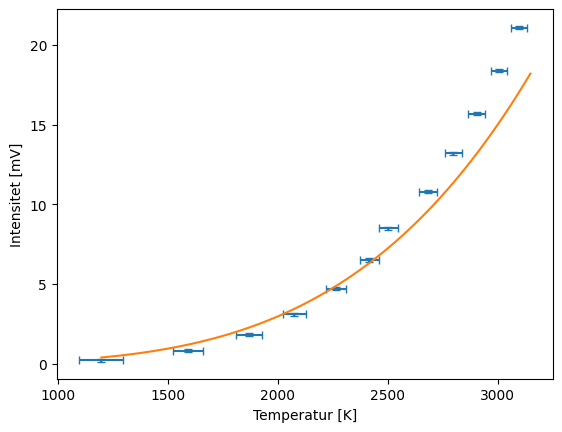

In [25]:
data = np.loadtxt('SB_lamp.csv', delimiter=',', dtype=float, skiprows=1)

mV = [k[2] for k in data]
dV = 0.1
T = [temp(k[1], k[0])+273.15 for k in data]
# I = [4e-4*k[3]**4 for k in data]
x = np.linspace(T[0], T[-1]+50, 100)

dT = [dtemp(k[1], k[2]) for k in data]

plt.errorbar(T, mV, fmt='o', xerr=dT, yerr=dV, capsize=3, markersize=1)
plt.plot(x, x**4 * sum([mV[k]/T[k]**4 for k in range(len(data))])/len(data))
plt.xlabel('Temperatur [K]')
plt.ylabel('Intensitet [mV]')
plt.savefig('SB_lamp.pdf')
plt.show()

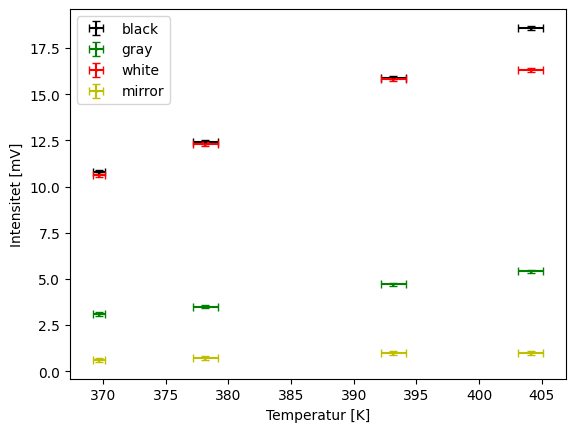

In [22]:
data = np.loadtxt('LC.csv', delimiter=',', dtype=float, skiprows=1)

T = [k[5]+273.15 for k in data]
err = [k[6] for k in data]
x = np.linspace(T[0], T[-1], 100)

for i, color, col in zip(range(4), ['black', 'gray', 'white', 'mirror'], ['k', 'g', 'r', 'y']):
    plt.errorbar(T, [k[i] for k in data], xerr=err, yerr=0.1, fmt=col+'o', label=color, capsize=3, markersize=1)
    # plt.plot(x, x**4 * sum([data[k][i]/T[k]**4 for k in range(4)])/4, col)


plt.xlabel('Temperatur [K]')
plt.ylabel('Intensitet [mV]')
plt.legend()
plt.savefig('LC.pdf')
plt.show()

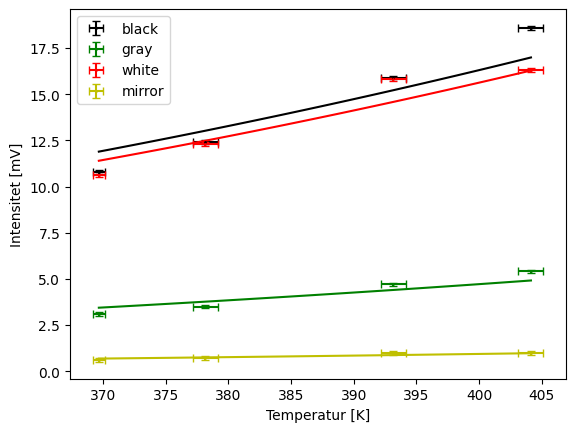

In [19]:
for i, color, col in zip(range(4), ['black', 'gray', 'white', 'mirror'], ['k', 'g', 'r', 'y']):
    plt.errorbar(T, [k[i] for k in data], xerr=err, yerr=0.1, fmt=col+'o', label=color, capsize=3, markersize=1)
    plt.plot(x, x**4 * sum([data[k][i]/T[k]**4 for k in range(4)])/4, col)

plt.xlabel('Temperatur [K]')
plt.ylabel('Intensitet [mV]')
plt.legend()
plt.savefig('LC_graphs.pdf')
plt.show()